## 电信运营商客户流失风险分析
对于一家公司，了解客户流失情况，对于后续经营是非常重要的。以下通过分析运营商中客户的使用情况，可以预测出将来是否会流失。

数据来自https://www.kesci.com/home/dataset/5e43f8b25f2816002ceb69d6

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#导入数据集文件
# csv_data='https://github.com/aprial/growth-workshop/blob/master/data/churn.csv'
csv_data='C:/Users/wade z shao/Downloads/'+'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data=pd.read_csv(csv_data)
print(data)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Y

数据公用7042行，主要有用户id，套餐及使用情况，简单的个人信息

“TotalCharges”（总消费额）存在数据问题，采用强制转换，将“TotalCharges”（总消费额）转换为浮点型数据。

In [5]:
print(data['TotalCharges'])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object


尝试将数据转换
data['TotalCharges'].astype(float)#不可行

第一遍执行
customerDF['TotalCharges']=customerDF['TotalCharges'].convert_objects(convert_numeric=True)
时候报错，

AttributeError: 'Series' object has no attribute 'convert_objects'



查看数据的描述统计信息，根据一般经验，所有数据正常。

In [7]:
# 获取数据类型的描述统计信息
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 可视化分析

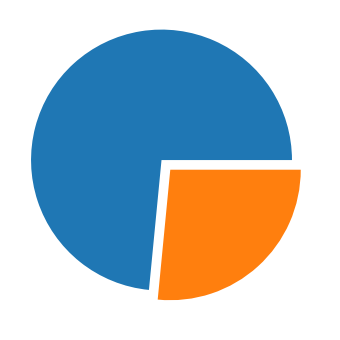

In [26]:
# plt.rcParams['figure.figsize']=6,6
plt.pie(data['Churn'].value_counts(),explode=(0.1,0))
# plt.pie(data['Churn'].value_counts(),labels=data['Churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
# plt.title('Churn(Yes/No) Ratio')
plt.show()

上面黄色代表流失人数，大约为1/4

这是用python绘制饼图，教程见https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pie.html

###  用户属性分析

In [28]:
churn_data=data['Churn'].value_counts().to_frame()
def barplot_percentage(feature,orient='v',axis_name="percentage of customers"):
    ratios=pd.DataFrame()
    g=(data.groupby(feature)["Churn"].value_counts()/len(data)).to_frame()
    print(g)
    plt.show()
barplot_percentage("SeniorCitizen") 
barplot_percentage('gender')

Churn
SeniorCitizen Churn          
0             No     0.640068
              Yes    0.197785
1             No     0.094562
              Yes    0.067585
                 Churn
gender Churn          
Female No     0.361920
       Yes    0.133324
Male   No     0.372710
       Yes    0.132046


可以看出来，年老用户人数虽然不多，但是流失率比年轻用户高；而不同性别流失率差异不大

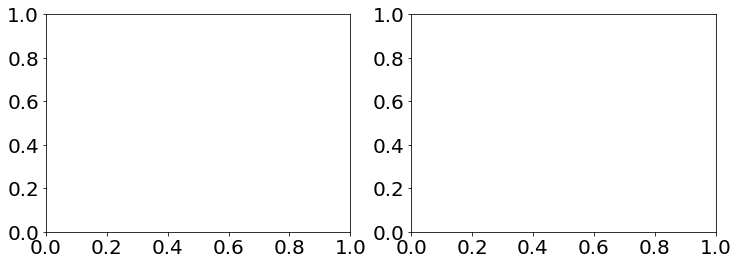

In [38]:
import seaborn

fig,axis=plt.subplots(1,2,figsize=(12,4))

gp_partner=(data.groupby('Partner')["Churn"].value_counts()/len(data)).to_frame()
# axis1=seaborn.barplot(x='1',y='1',data=gp_partner)

gp_dependents=(data.groupby('Dependents')["Churn"].value_counts()/len(data)).to_frame()
# axis2=seaborn.barplot(x='2',y='2',data=gp_dependents)

plt.show()

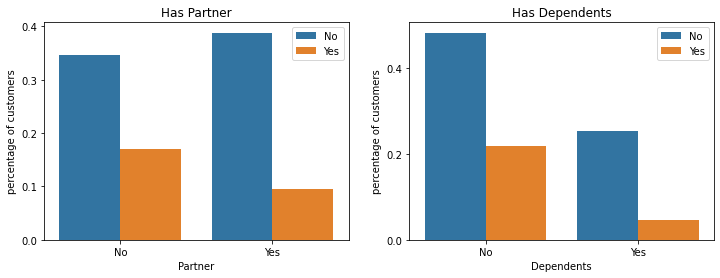

In [37]:
import seaborn
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has Partner")
axis[1].set_title("Has Dependents")
axis_y = "percentage of customers"

# Plot Partner column
gp_partner = (data.groupby('Partner')["Churn"].value_counts()/len(data)).to_frame()
gp_partner.rename(columns={"Churn": axis_y}, inplace=True)
gp_partner.reset_index(inplace=True)
ax1 = seaborn.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
ax1.legend(fontsize=10)
#ax1.set_xlabel('伴侣')


# Plot Dependents column
gp_dep = (data.groupby('Dependents')["Churn"].value_counts()/len(data)).to_frame()
#print(gp_dep)
gp_dep.rename(columns={"Churn": axis_y} , inplace=True)
#print(gp_dep)
gp_dep.reset_index(inplace=True)
#print(gp_dep)

ax2 = seaborn.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])
#ax2.set_xlabel('家属')


#设置字体大小
plt.rcParams.update({'font.size': 20})
ax2.legend(fontsize=10)

#设置
plt.show()


NameError: name 'sns' is not defined

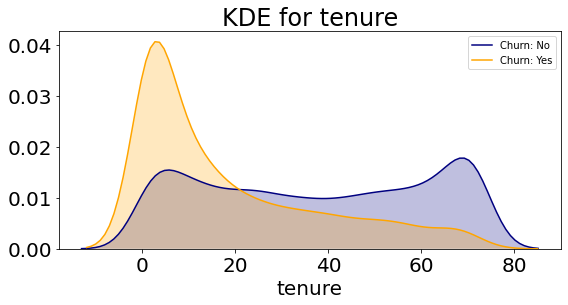

In [41]:
# Kernel density estimaton核密度估计
def kdeplot(feature,xlabel):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = seaborn.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No', shade='True')
    ax1 = seaborn.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes',shade='True')
    plt.xlabel(xlabel)
    #设置字体大小
    plt.rcParams.update({'font.size': 20})
    plt.legend(fontsize=10)
kdeplot('tenure','tenure')
plt.show()

小结：

- 有伴侣的用户流失占比低于无伴侣用户；
- 有家属的用户较少；
- 有家属的用户流失占比低于无家属用户;
- 在网时长越久，流失率越低，符合一般经验；
- 在网时间达到三个月，流失率小于在网率，证明用户心理稳定期一般是三个月。